In [23]:
pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
# 데이터 플로팅 라이브러리
import matplotlib.pyplot as plt
# 숫자 처리 라이브러리
import numpy as np
# 딥러닝을 위한 파이토치 라이브러리
import torch
from torch import nn, optim
# 토치비전 라이브러리
import torchvision
from torchvision import transforms, datasets, models
# 이미지 처리 라이브러리 (PIL, pillow)
from PIL import Image

# 주피터 노트북에서 plot이 보이도록 설정
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [25]:
data_dir = './data/반려견/유증상'
valid_size = 0.2

t_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.Resize(224),
    transforms.ToTensor()
])

print(t_transforms)



Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [26]:
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir, transform=t_transforms)

# 학습 데이터의 형식을 확인한다.
print(train_data)
print(len(train_data), len(test_data))

Dataset ImageFolder
    Number of datapoints: 600
    Root location: ./data/반려견/유증상
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
600 600


In [27]:
num_train = len(train_data)
indices = list(range(num_train))

# 인덱스 리스트를 랜덤하게 섞고 확인한다.
np.random.shuffle(indices)

In [28]:
split = int(np.floor(valid_size * num_train))



In [29]:
train_idx, test_idx = indices[split:], indices[:split]

In [30]:
from torch.utils.data.sampler import SubsetRandomSampler
# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# 데이터 로딩을 위한 loader를 만든다. (sampler, 배치 사이즈 등 지정)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, sampler=test_sampler)

print(train_loader.dataset.classes)
print(test_loader.dataset.classes)

['A1_구진_플라크', 'A2_비듬_각질_상피성잔고리', 'A3_태선화_과다색소침착', 'A4_농포_여드름', 'A5_미란_궤양', 'A6_결절_종괴']
['A1_구진_플라크', 'A2_비듬_각질_상피성잔고리', 'A3_태선화_과다색소침착', 'A4_농포_여드름', 'A5_미란_궤양', 'A6_결절_종괴']


In [31]:
def load_split_train_test(data_dir, valid_size):
    t_transforms = transforms.Compose([
               transforms.RandomResizedCrop(224),
               transforms.Resize(224),
               transforms.ToTensor()
    ])


    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, test_idx = indices[split:], indices[:split]

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, sampler=train_sampler)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, sampler=test_sampler)
    
    return train_loader, test_loader

In [32]:
train_loader, test_loader = load_split_train_test(data_dir, 0.2)

In [33]:
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, batch_size=num, sampler=sampler)
    
    # loader에서 데이터를 한 개씩 꺼내 주는 iterator를 만든다.
    dataiter = iter(loader)
    images, labels = next(dataiter)
    
    return images, labels

/Users/eatcoding/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eatcoding/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eatcoding/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eatcoding/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eatcoding/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45796 (

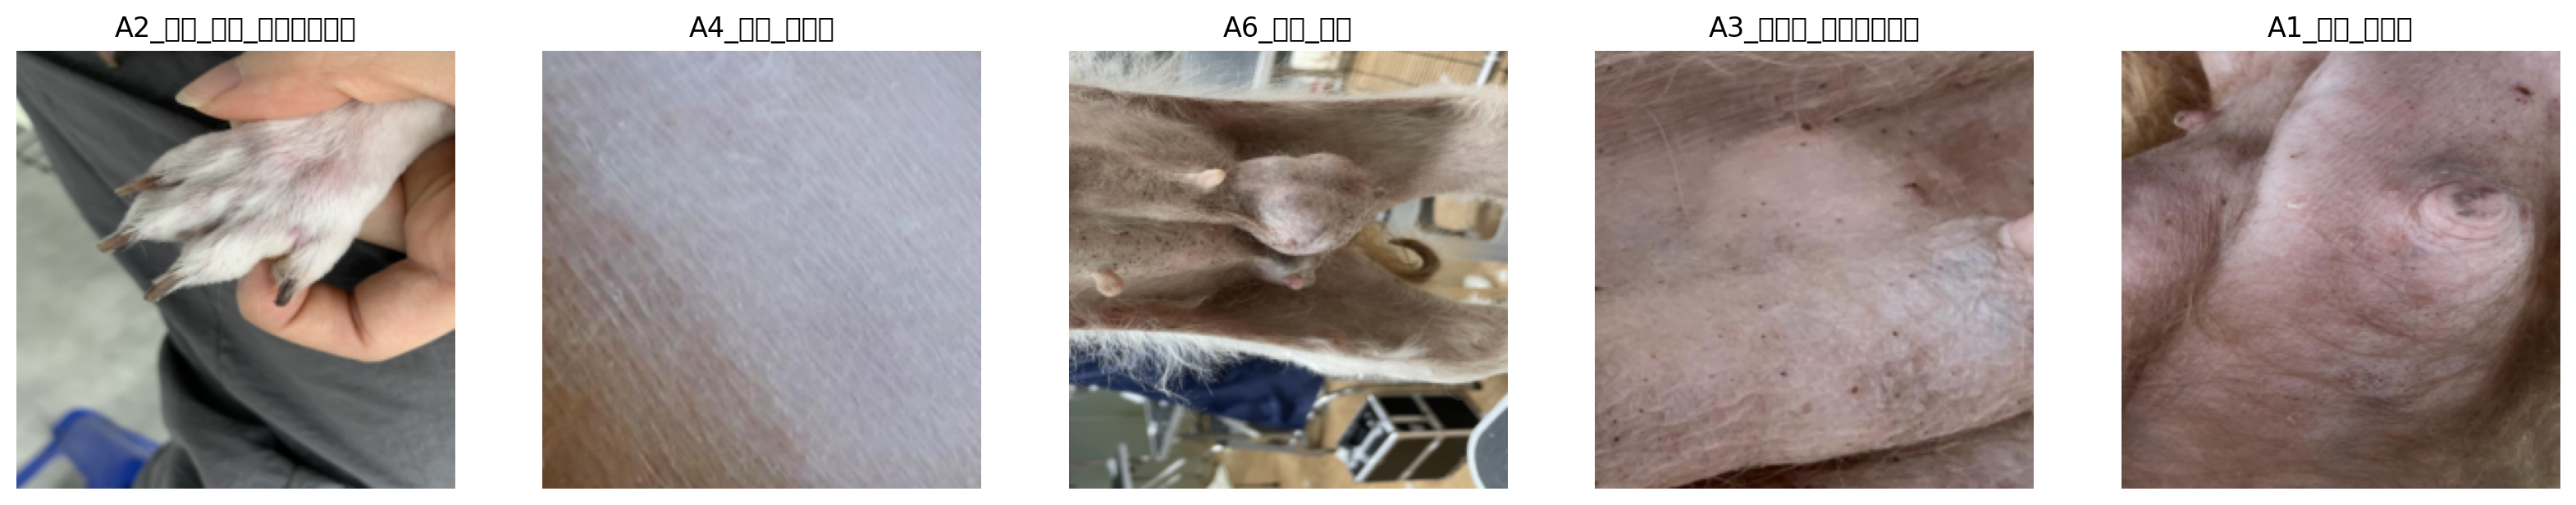

In [34]:
images, labels = get_random_images(5)
# 픽셀 배열을 PIL 형식의 이미지로 변환하고 이미지 크기를 지정한다.
to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20, 20))

# 학습 데이터의 class 리스트를 얻는다.
classes = train_loader.dataset.classes

# 이미지를 표시하기 위한 설정을 한다.
for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    index = labels[ii].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)

# 주피터 노트북에 이미지를 표시한다.
plt.show()

In [35]:
# compute device를 정하고 확인한다.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [36]:
model = models.resnet50(pretrained=True)

In [37]:
# 모든 신경망 구축 : 전이학습을 위해 모델의 가중치를 freeze 한다.
for param in model.parameters():
    param.requires_grad = False
# 뉴런들을 연결하여 신경망을 생성한다.
model.fc = nn.Sequential(nn.Linear(2048, 512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, 6),
                         nn.LogSoftmax(dim=1))
# q: explain the above code
# a: 2048개의 입력을 받아 512개의 출력을 내고, ReLU 함수를 거쳐 0.2의 확률로 Dropout을 적용한다.
# 512개의 입력을 받아 2개의 출력을 내고, LogSoftmax 함수를 거쳐 1차원으로 변환한다.
# 1차원으로 변환된 출력을 갖는 신경망을 생성한다.

# 손실함수를 Cross entropy loss 함수로 지정한다.
criterion = nn.NLLLoss()

# why
# optimizer를 Adam으로 지정한다.
optimizer = optim.Adam(model.fc.parameters(), lr=0.004)
# what is Adam

# 신경망을 compute device로 보낸다.
model.to(device)
# 종료 여부를 출력한다.
print('done!')

done!


In [38]:
# 에폭 및 출력 간격을 설정한다.
epochs = 12
print_every = 5
# 손실 변수들을 초기화 한다.
running_loss = 0
training_losses, test_losses = [], []

# 현재의 학습 단계를 표현하는 steps 변수를 0으로 초기화 한다.
steps = 0

In [39]:
# 설정한 회수만큼 학습 후 테스트 및 평가해 본다.
for epoch in range(epochs):
    epoch += 1

    for inputs, labels in train_loader:
        steps += 1
        print('Training step', steps)

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            #손실과 정확도 변수를 초기화
            test_loss = 0
            accuracy = 0
            #모델 평가 모드로 전환
            model.eval()

            # 모델 평가시 gradient를 계산 하지 않도록 한다.
            with torch.no_grad():
                # testloader 로부터 모든 이미지와 레이블을 로드한다.
                for inputs, labels in test_loader:
                    # 입력 데이터(이미지, 레이블)를 device로 보낸다.
                    inputs, labels = inputs.to(device), labels.to(device)
                    # 입력 데이터로 순전파를 수행하고 로그 확률을 얻는다.
                    logps = model.forward(inputs)
                    # 손실 값을 계산한다.
                    batch_loss = criterion(logps, labels)
                    # 손실을 누적한다.
                    test_loss += batch_loss.item()
                    # 로그 확률로부터 진짜 확률 값을 계산한다.
                    ps = torch.exp(logps)
                    # 가장 . 큰 확률 값과 class 를 얻는다. (topk: k번쨰로 큰값)
                    top_p, top_class = ps.topk(1, dim=1)
                    # 레이블들을 top_class와 동일한 형태로 바꾼후 같은 값들을 얻는다.
                    equals = top_class == labels.view(*top_class.shape)
                    # equals를 float 텐서로 바꾼 후 평균 정확돌르 누적 계산한다.
                    accuracy += torch.mean(equals.type(torch.FloatTensor))

            #학습 손실 값과 테스트 손실값을 추가한다.
            training_losses.append(running_loss/len(train_loader))
            test_losses.append(test_loss/len(test_loader))

            print(f"Epoch {epoch}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            # 모델을 학습 모드로 전환한다.
            model.train()
            break

Training step 1
Training step 2
Training step 3
Training step 4
Training step 5
Epoch 1/12.. Train loss: 7.008.. Test loss: 3.283.. Test accuracy: 0.133
Training step 6
Training step 7
Training step 8
Training step 9
Training step 10
Epoch 2/12.. Train loss: 2.957.. Test loss: 2.042.. Test accuracy: 0.148
Training step 11
Training step 12
Training step 13
Training step 14
Training step 15
Epoch 3/12.. Train loss: 2.018.. Test loss: 1.874.. Test accuracy: 0.164
Training step 16
Training step 17
Training step 18
Training step 19
Training step 20
Epoch 4/12.. Train loss: 1.868.. Test loss: 1.758.. Test accuracy: 0.234
Training step 21
Training step 22
Training step 23
Training step 24
Training step 25
Epoch 5/12.. Train loss: 1.797.. Test loss: 1.695.. Test accuracy: 0.297
Training step 26
Training step 27
Training step 28
Training step 29
Training step 30
Epoch 6/12.. Train loss: 1.706.. Test loss: 1.688.. Test accuracy: 0.281
Training step 31
Training step 32
Training step 33
Training s

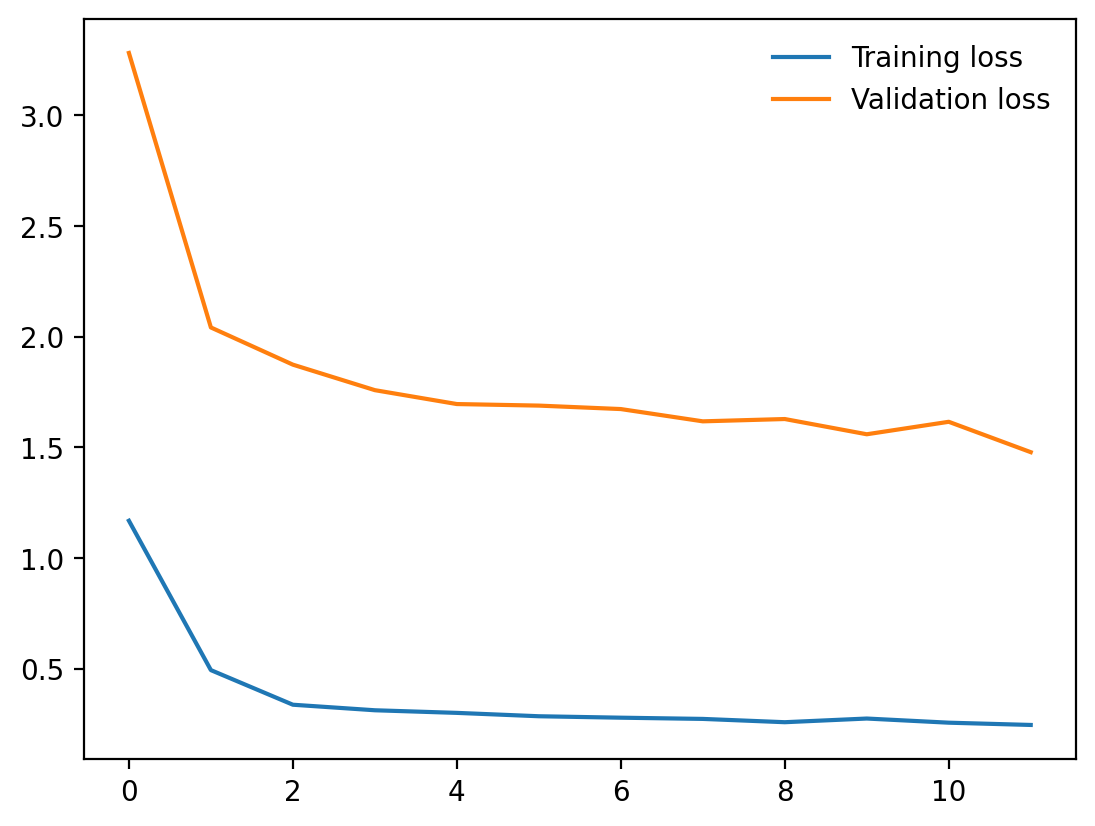

In [40]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(training_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [41]:
torch.save(model, 'model.pth')